In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [3]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [4]:
X=df
Y=dataset.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=98)

In [6]:
mean=np.asanyarray(X_train.mean())
std=np.asanyarray(X_train.std())

In [7]:
X_test_sub=X_test.sub(mean,axis='columns')
X_test_stnd=X_test_sub.div(std,axis='columns')  

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_stnd=scaler.fit_transform(X_train)

In [9]:
X_test_stnd.fillna(0,inplace=True)

# Part A.

In [10]:
class myLogisticRegression:
    def __init__(self, LearningRate, iteration):
        self.LearningRate=LearningRate
        self.iteration=iteration
        
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    
                  
    def fit(self, X, Y):
        samples ,features=X.shape
        self.beta1=np.zeros(features)
        self.beta0=0
        
        for i in range(1,self.iteration):
            x=np.dot(X, self.beta1)+self.beta0
            y_=self.sigmoid(x)
            delta_beta1=np.dot(np.transpose(X), (Y-y_))
            delta_beta0=np.sum(Y-y_)
            self.beta1=self.beta1+(self.LearningRate)*(delta_beta1)
            self.beta0=self.beta0+(self.LearningRate)*(delta_beta0)
            
    def predict(self, X):
        x=self.beta0+np.dot(X, self.beta1)
        y_pred=self.sigmoid(x)
        y=[]
        for i in y_pred:
            if i >= 0.5:
                y.append(1)
            else:
                y.append(0) 
        
        return y
    
    def predict_proba(self,X):
        x=self.beta0+np.dot(X, self.beta1)
        return self.sigmoid(x)
    
    def score(self,y,y_pred):
        self.y=y
        self.y_pred=y_pred
        return np.sum(self.y==self.y_pred)/len(self.y)

# Part B.

In [11]:
myLR=myLogisticRegression(0.01,100)
myLR.fit(X_train_stnd, y_train)

In [12]:
my_y_pred=myLR.predict(X_test_stnd)

In [13]:
print('My LR Score (or Accuracy): ',myLR.score(y_test, my_y_pred))

My LR Score (or Accuracy):  0.9649122807017544


# Part E.

In [14]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=1)
LR.fit(X_train_stnd, y_train)

LogisticRegression(random_state=1)

In [15]:
y_pred=LR.predict(X_test_stnd)
print('LR Score (or Accuracy): ',LR.score(X_test_stnd,y_test))

LR Score (or Accuracy):  0.956140350877193


D:\Users\ASUS-C\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
D:\Users\ASUS-C\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [16]:
from sklearn.metrics import roc_curve , roc_auc_score

In [17]:
P=LR.predict_proba(X_test_stnd)
y_probs=P[:, 1]

D:\Users\ASUS-C\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [18]:
LR_fpRate, LR_tpRate, th=roc_curve(y_test, y_probs)

In [19]:
auc=roc_auc_score(y_test, y_probs)

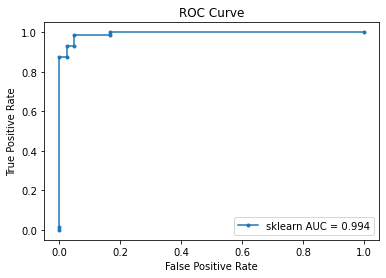

In [20]:
plt.plot(LR_fpRate, LR_tpRate,marker='.',label='sklearn AUC = %0.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Accuracy of sklearn buiult-in function is slightly different from my accuracy function. The difference is because of learning rate.